Import module printing the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#READ DATA
data=pd.read_csv("/content/sample_data/Example (1).csv",encoding="latin-1")
data.head(10)

,Text,lable,Clean Dataset
0,`- This is not ``creative``. Those are the di...,1.0,this creative those dictionary definitions ter...
1,` :: the term ``standard model`` is itself le...,0.0,term standard model less npov think wed prefer...
2,"True or false, the situation as of March 200...",0.0,true false situation march saudi proposal land...
3,"Next, maybe you could work on being less cond...",1.0,next maybe could work less condescending sugge...
4,This page will need disambiguation.,0.0,this page need disambiguation
5,:If I may butt in I've spent the last 1/4 h...,1.0,may butt ive spent last hour following andre t...
6,` Changed Macedonia link to Macedon; ancients ...,1.0,changed macedonia link macedon ancients didnt ...
7,"` :::: You're onto something important, there...",1.0,youre onto something important even liturgical...
8,`I posted this to because the timeline confus...,0.0,posted timeline confused hey tried clean timel...
9,There is no such thing as Christian religiocen...,1.0,there thing christian religiocentrism come ple...


In [3]:
data = pd.read_csv("/content/sample_data/Example (1).csv", encoding='latin-1')

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
import nltk
from nltk.corpus import stopwords
import string
import re

# **SAMPLE DATA 4000**

In [5]:
# Sample data

sample_data = data.sample(4000,replace=True, random_state=1)
X = sample_data['Text']
y = sample_data['lable']
print(X)
print(y)

235       == Parentage and children ==  I see this was...
3980      Wow, that's like six-million times better th...
905     `  It seems to me, to use a Christian metaphor...
2763    `   Sooooo... Does any OTHER admin want to com...
2895      ==  English versions ==  There is not need t...
                              ...                        
1724      ::The previous format of the page provides a...
4037     April 2006 (UTC)  ::: You allopaths took it u...
4182      I told you he was notable, medical men who b...
2318    Welcome!  Hello, , and welcome to Wikipedia! T...
271     `  :It's so easy you could do it yourself if y...
Name: Text, Length: 4000, dtype: object
235     0.0
3980    0.0
905     1.0
2763    1.0
2895    1.0
       ... 
1724    0.0
4037    1.0
4182    0.0
2318    1.0
271     1.0
Name: lable, Length: 4000, dtype: float64


# WORD CLOUD

In [6]:
from wordcloud import WordCloud

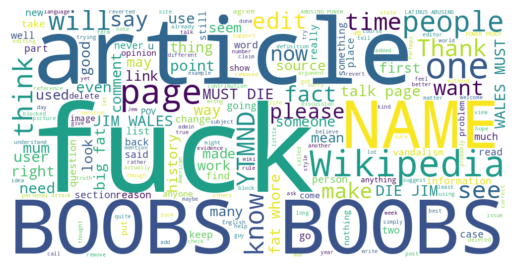

In [7]:
# Sample a subset of the data to avoid processing the entire dataset
sample_data = data['Text'].sample(4000, replace=True,random_state=1)  # Adjust the sample size as needed

# Create a string with all text data from the sample
word_cloud = " ".join(str(text) for text in sample_data)

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white', min_font_size=10).generate(word_cloud)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()


# STOP WORDS

In [8]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# CLEAN DATA

In [9]:
import re
import string
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Dictionary of short forms and their corresponding full forms
abbreviation_map = {
    "isn't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "couldn't": "could not",
    "don't": "do not",
    "doesn't": "does not",
    "it's": "it is",
    "i'm": "I am",
    "you're": "you are",
    "he's": "he is",
    "she's": "she is",
    "we're": "we are",
    "they're": "they are",
    "I've": "I have",
    "we've": "we have",
    "you've": "you have",
    "they've": "they have",
    "I'll": "I will",
    "you'll": "you will",
    "he'll": "he will",
    "she'll": "she will",
    "we'll": "we will",
    "they'll": "they will",
    "I'd": "I would",
    "you'd": "you would",
    "he'd": "he would",
    "she'd": "she would",
    "we'd": "we would",
    "they'd": "they would",
    "let's": "let us",
    "who's": "who is",
    "what's": "what is",
    "where's": "where is",
    "there's": "there is",
    "here's": "here is",
    "that's": "that is",
    "how's": "how is",
    "isn't": "is not",
    "didn't": "did not",
    "wasn't": "was not",
    "weren't": "were not",
    "wouldn't": "would not",
    "shouldn't": "should not",
    "hasn't": "has not",
    "hadn't": "had not",
    "won't": "will not",
    "wouldn't": "would not",
    "couldn't": "could not",
    "doesn't": "does not"
}

def clean_text(text):
    # Handle potential float values by converting to string first
    if isinstance(text, float):
        text = str(text)

    # Convert to lowercase
    text = text.lower()

    # Replace short forms with full forms
    for short_form, full_form in abbreviation_map.items():
        text = text.replace(short_form, full_form)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove email addresses
    text = re.sub(r'\b\w+@\w+\.\w+\b', '', text)

    # Remove digits
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove extra whitespace
    text = text.strip()

    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    # Remove special characters and short words
    text = re.sub(r':|<|>|>>|[^a-zA-Z\s]', '', text)

    # Remove 1 or 2 character words (excluding specific words like "no")
    words_to_keep = ["no"]
    pattern = r'\b(?!' + r'\b|\b'.join(words_to_keep) + r'\b)\w{1,2}\b'
    text = re.sub(pattern, '', text)

    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

# Apply the function to the 'Text' column of your DataFrame
data['Text'] = data['Text'].apply(clean_text)
data = pd.read_csv("/content/sample_data/Example (1).csv", encoding='latin-1')

# Apply the clean_text function to the 'Text' column of your DataFrame
data['Cleaned_Text'] = data['Text'].apply(clean_text)

# Save the cleaned data to a new CSV file
data.to_csv('cleaned_data.csv', index=False)

data.head(20)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,lable,Clean Dataset,Cleaned_Text
0,`- This is not ``creative``. Those are the di...,1.0,this creative those dictionary definitions ter...,creative dictionary definitions terms insuranc...
1,` :: the term ``standard model`` is itself le...,0.0,term standard model less npov think wed prefer...,term standard model less npov think would pref...
2,"True or false, the situation as of March 200...",0.0,true false situation march saudi proposal land...,true false situation march saudi proposal land...
3,"Next, maybe you could work on being less cond...",1.0,next maybe could work less condescending sugge...,next maybe could work less condescending sugge...
4,This page will need disambiguation.,0.0,this page need disambiguation,page need disambiguation
5,:If I may butt in I've spent the last 1/4 h...,1.0,may butt ive spent last hour following andre t...,may butt ive spent last hour following andre t...
6,` Changed Macedonia link to Macedon; ancients ...,1.0,changed macedonia link macedon ancients didnt ...,changed macedonia link macedon ancients call l...
7,"` :::: You're onto something important, there...",1.0,youre onto something important even liturgical...,onto something important even liturgical renew...
8,`I posted this to because the timeline confus...,0.0,posted timeline confused hey tried clean timel...,posted timeline confused hey tried clean timel...
9,There is no such thing as Christian religiocen...,1.0,there thing christian religiocentrism come ple...,thing christian religiocentrism come please st...


In [10]:

data.head()
data.shape
print(data.shape)
print(data.head())
print(data.columns)
print(X.head())
print(y.head())


(5000, 4)
                                                Text  lable  \
0  `- This is not ``creative``.  Those are the di...    1.0   
1  `  :: the term ``standard model`` is itself le...    0.0   
2    True or false, the situation as of March 200...    0.0   
3   Next, maybe you could work on being less cond...    1.0   
4               This page will need disambiguation.     0.0   

                                       Clean Dataset  \
0  this creative those dictionary definitions ter...   
1  term standard model less npov think wed prefer...   
2  true false situation march saudi proposal land...   
3  next maybe could work less condescending sugge...   
4                      this page need disambiguation   

                                        Cleaned_Text  
0  creative dictionary definitions terms insuranc...  
1  term standard model less npov think would pref...  
2  true false situation march saudi proposal land...  
3  next maybe could work less condescending sugge...  

Eliminate last 17 thousand dataset beacuse its too long and time wasting

In [11]:
data = data.iloc[:4000,:]

In [12]:
data['lable'].value_counts()

,count
lable,
1.0,2406
0.0,1594


visualize the leable

<Axes: xlabel='lable'>

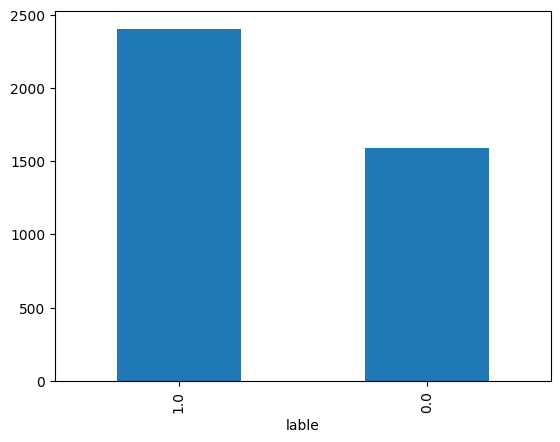

In [13]:
data['lable'].value_counts().plot(kind='bar')

Creating a pie chart for the label i got

Text(0.5, 1.0, 'label distribution')

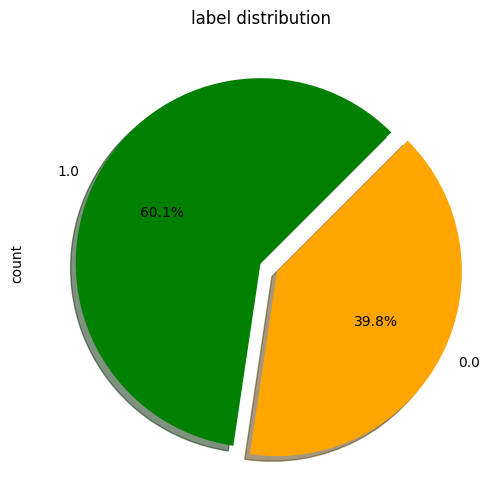

In [14]:
plt.figure(figsize=(10,6))
colors = ['green', 'orange']
data['lable'].value_counts().plot(kind='pie', autopct='%.1f%%',shadow = True,colors = colors,startangle = 45,
                 explode=(0, 0.1))
plt.title('label distribution')


the code is trying to extract the value at the 999th position within the  column

visualizing the negetive and positive words,it counts frequents word of each category

In [15]:
data['Text'][999]

'  == Pig Fenian ==  Nice wrist action boys, keep it up.  '

In [16]:
print(data.columns)

Index(['Text', 'lable', 'Clean Dataset', 'Cleaned_Text'], dtype='object')


Text to numbering featuress


# Text to matrix

# **Use TfidfVectorizer**

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer # convert a collection of raw text documents into a matrix
tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
# Extract the label values from the 'data' DataFrame and assign them to variable 'y'
data['Text'] = data['Text'].fillna('')
y=data.lable.values
x=tfidf.fit_transform(data.Text)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2,shuffle=False)

In [19]:
from sklearn.linear_model import LogisticRegressionCV
#cross-validation to select the best regularization parameter.
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   18.4s finished


In [20]:
from sklearn import metrics


print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Train Accuracy:", metrics.accuracy_score(y_train, clf.predict(X_train)))


Test Accuracy: 0.6275
Train Accuracy: 0.595


In [21]:
!pip install transformers


In [22]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [23]:
# Initialize the DistilBERT tokenizer
distilbert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize the data for DistilBERT
encoded_data = distilbert_tokenizer.batch_encode_plus(
    data['Text'].tolist(),          # Column containing the text
    add_special_tokens=True,        # Add special tokens (like [CLS], [SEP])
    return_attention_mask=True,     # Return attention mask
    padding=True,                   # Pad all to the same length
    truncation=True,                # Truncate longer sequences
    max_length=128,                 # Maximum input length for DistilBERT
    return_tensors='pt'             # Return PyTorch tensors
)

# Extract input_ids and attention_mask from the encoded data
input_ids = encoded_data['input_ids']
attention_mask = encoded_data['attention_mask']


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [24]:
class TextDataset(Dataset):
    def __init__(self, input_ids, attention_mask, labels):
        self.input_ids = input_ids
        self.attention_mask = attention_mask
        self.labels = labels

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_mask[idx],
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

    def __len__(self):
        return len(self.labels)


In [25]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(input_ids, data['lable'].values, test_size=0.2, random_state=42)
train_mask, test_mask = train_test_split(attention_mask, test_size=0.2, random_state=42)

# Create datasets
train_dataset = TextDataset(X_train, train_mask, y_train)
test_dataset = TextDataset(X_test, test_mask, y_test)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)


In [26]:
# Load DistilBERT model for binary classification
distilbert_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# Move the model to the GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
distilbert_model.to(device)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [27]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [28]:
import torch
from torch.cuda.amp import autocast, GradScaler  # Mixed precision tools

# Define optimizer and gradient scaler for mixed precision
optimizer = torch.optim.AdamW(distilbert_model.parameters(), lr=1e-5)
scaler = GradScaler()  # For mixed precision training

# Gradient accumulation steps to reduce the number of backward passes
accumulation_steps = 2  # Adjust this according to your GPU memory

# Training loop
epochs = 2  # Number of epochs

for epoch in range(epochs):
    distilbert_model.train()  # Set the model to training mode
    total_loss = 0

    for step, batch in enumerate(train_loader):
        optimizer.zero_grad()  # Clear gradients

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Mixed precision forward pass
        with autocast():
            outputs = distilbert_model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss / accumulation_steps  # Divide loss by accumulation steps

        # Scaled backward pass
        scaler.scale(loss).backward()

        # Step optimizer after accumulation steps
        if (step + 1) % accumulation_steps == 0:
            scaler.step(optimizer)
            scaler.update()

        total_loss += loss.item() * accumulation_steps  # Re-scale loss

    avg_train_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_train_loss:.4f}')


<ipython-input-28-1b472e2c5ddd>:6: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()  # For mixed precision training
/usr/local/lib/python3.10/dist-packages/torch/amp/grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
<ipython-input-28-1b472e2c5ddd>:26: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:265: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Epoch 1/2, Loss: 0.6753
Epoch 2/2, Loss: 0.6665


In [29]:
distilbert_model.eval()  # Set the model to evaluation mode
predictions = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        # Forward pass
        outputs = distilbert_model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)
        predictions.extend(preds.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'DistilBERT Accuracy: {accuracy:.2f}')


DistilBERT Accuracy: 0.59
